Привет, меня зовут Дмитрий Акимов и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев. 
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее». 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучение-на-векторах-построенных-TF-IDF-методом" data-toc-modified-id="Обучение-на-векторах-построенных-TF-IDF-методом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение на векторах построенных TF IDF методом</a></span></li><li><span><a href="#Spacy-lemmatizer" data-toc-modified-id="Spacy-lemmatizer-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Spacy lemmatizer</a></span></li><li><span><a href="#Обучение-на-векторах-построенных-методом-BERT" data-toc-modified-id="Обучение-на-векторах-построенных-методом-BERT-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение на векторах построенных методом BERT</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп». Проект выполнен с BERT'ом.

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Цели и задачи проекта

Заказчиком поставлена задача подготовить модель выполняющую оценку токсичности отзыва, как следствие необходимости отправки его на модерацию.

Описание данных

Представлены данные о порядка 160 тыс. отзывах: текст отзыва и оценка токсичности.

План работы

Планируется провести:

Анализ представленного датасета на наличие пропусков.
Оценка объема данных на предмет возможности их обработки с учетом доступных аппаратных ресурсов.
Подготовка данных для обучения моделей (лемматизация, токенизация, векторизация).
Обучение и выбор гиперпараметров используя модели Линейной регрессии, LinearSVC.
Тестирование моделей на выбранных гиперпараметрах на тестовой выборке.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Не обязательно копировать всё описание проекта, если оставить только то, что написал ты - будет намного лучше)
</div>
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> поправил
</div>

## Подготовка

In [1]:
'''%pip install transformers'''

'%pip install transformers'

In [2]:
'''# Install spaCy (run in terminal/prompt)
import sys
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en'''

"# Install spaCy (run in terminal/prompt)\nimport sys\n!{sys.executable} -m pip install spacy\n# Download spaCy's  'en' Model\n!{sys.executable} -m spacy download en"

In [3]:
#библиотеки
import pandas as pd
import string
import re
import nltk
import numpy as np
import torch
import mapply
from tqdm.auto import tqdm

#датасеты/словари
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#модели

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC

#методы
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import spacy
import transformers as ppb
from transformers import AutoModelForMaskedLM, AutoTokenizer
from tqdm import notebook 
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
data = pd.read_csv('/datasets/toxic_comments.csv')
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Отлично, данные загружены, библиотеки импортированы в начале работы.
</div>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
data.describe()

,toxic
count,159571.000000
mean,0.101679
std,0.302226
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
max_len = data['text'].str.len().max()
max_len

5000

<AxesSubplot:>

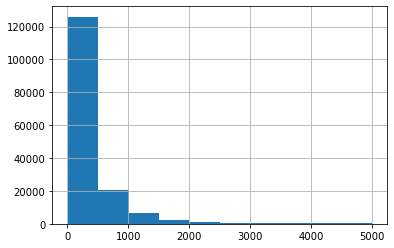

In [8]:
data['text'].str.len().hist()

In [9]:
data['text'].str.len().value_counts(normalize=True,bins=10).sort_index()

(1.0050000000000001, 505.4]    0.789749
(505.4, 1004.8]                0.127122
(1004.8, 1504.2]               0.041524
(1504.2, 2003.6]               0.016325
(2003.6, 2503.0]               0.007551
(2503.0, 3002.4]               0.004581
(3002.4, 3501.8]               0.003566
(3501.8, 4001.2]               0.003071
(4001.2, 4500.6]               0.002488
(4500.6, 5000.0]               0.004023
Name: text, dtype: float64

In [10]:
# распределение токсичных комментариев в общем датасете
print('распределение целевого признака в представленном датасете')
print(data['toxic'].value_counts(normalize=True))
# распределение токсичных комментариев в датасете сокращенном по длине комментария до 1500 символов
print('распределение целевого признака в датасете сокращенном до комментариев длинной до 1500 символов')
data.loc[data['text'].str.len()<=1500,'toxic'].value_counts(normalize=True)

распределение целевого признака в представленном датасете
0    0.898321
1    0.101679
Name: toxic, dtype: float64
распределение целевого признака в датасете сокращенном до комментариев длинной до 1500 символов


0    0.897063
1    0.102937
Name: toxic, dtype: float64

<b>Вывод</b> 

Для анализа представлена база текстов комментариев, содержащая 159571 запись. Пропуски не установлены.
Распределение тестов по длине показывает что 95% текстов относятся к группе длиной до 1500 символов.

После токенизации, при необходимости возможно рассмотреть вопрос ограничения выборки по длинне комментария. Это существенно сократит формируемые после пэддинга массивы и снизит требования по оперативной памяти.

Также в датасете имеет место дисбаланс целевого признака - токсичные комментарии составляют порядка 10%, причем как в общем датасете, так и в сокращенном по длине комментария.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Хорошее исследование. Если учесть, что BERT модели ограничены по количеству токенов, то лучше, конечно, смотреть на количество слов, но в остальном - все очень круто.
</div>
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> поправил вывод
</div>

## Предобработка

В рамках предобработки проведем следующие процедуры:
- токенизация текста
- очистка текста от стоп-слов
- очистка текста от знаков препинания и ненужных символов
- проведем лемматизацию текста (для моделей кроме BERT)
- добавим маркеры начала и конца предложения
- осуществим векторизацию текста средствами TF-IDF и библиотеки BERT


In [11]:
#Векторизация средствами, не связанными с моделью BERT
stop_words = set(nltk_stopwords.words('english'))
punctuation = string.punctuation 
wordnet_lemmatizer = WordNetLemmatizer()

In [12]:
#добавляем функция определения тега слова 
#для сохранения принадлежности к части речи (существительное, глагол и т.п.) при лемматизации
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [13]:
def token_it(text):
    elements = [ word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    elements = list(filter(lambda t: t not in punctuation, elements)) 
    elements = list(filter(lambda t: t.lower() not in stop_words, elements))
    final_elements = []
    final_elements = []
    for element in elements:
        text_ = re.sub(r'[^a-zA-Z]',' ',element)
        text_ = " ".join(text_.split())
        text_ = text_.lower()
        final_elements.append(text_)
    final_elements = list(
                     map(lambda token: wordnet_lemmatizer.lemmatize(token,get_wordnet_pos(token)), final_elements))

    return ' '.join(final_elements)

In [14]:
def spacy_it(text):
    elements = [ word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    elements = list(filter(lambda t: t not in punctuation, elements)) 
    elements = list(filter(lambda t: t.lower() not in stop_words, elements))
    
    final_elements = []
    for element in elements:
        text_ = re.sub(r'[^a-zA-Z]',' ',element)
        text_ = " ".join(text_.split())
        text_ = text_.lower()
        final_elements.append(text_)
    
    sentence = " ".join(final_elements)
    doc = nlp(sentence)

    return ' '.join([token.lemma_ for token in doc])

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера v1</b>
     
❌ Отличная предобработка данных, ты правильно выполнил очистку и удалил стоп-слова, но у тебя не совсем верно работает лемматизация. WordNetLemmatizer требует проставления POS-tag(определяет часть речи), поэтому у тебя все слова преобразовывались как существительные. https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/ В статье описываются варианты лемматизации и есть пример правильной лемматизации с использование WordNetLemmatizer, но я бы рекомендовал использовать spaCy - она быстрее и сама определяет часть речи.
    
Попробуй применить свою функцию на одном комментарии, ты очень удивишься результату. Поправь это)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> добавил spacy, worldnet пришлось убрать. После добавления POS-tag он неприлично долго стал считать
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Отлично, spaCy работает правильно. Да, pos-tag очень долго проставляются и виноваты в этом длинные комментарии.
</div>

In [15]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [22]:
%%time
tqdm.pandas(desc='my bar!')
data['text_spacy'] = data['text'].progress_map(spacy_it)

my bar!:   0%|          | 0/159571 [00:00<?, ?it/s]

Wall time: 17min 43s


In [73]:
data.head()

,text,toxic,text_spacy
0,Explanation\nWhy the edits made under my usern...,0,explanation edit make username hardcore metall...
1,D'aww! He matches this background colour I'm s...,0,d aww match background colour m seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man m really try edit war s guy constantly...
3,"""\nMore\nI can't make any real suggestions on ...",0,can n t make real suggestion improvement won...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page s


<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера v1</b>
     
❌ Мы не должны менять распределение целевого признака у тестовой и валидационной выборки, иначе мы искажаем оценку нашей модели.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> перенес устранение баланса ниже, после разделения выборки на учебную и тестовую
</div>

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        159571 non-null  object
 1   toxic       159571 non-null  int64 
 2   text_spacy  159571 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [24]:
data_train, data_test = train_test_split(data,test_size=0.2,random_state=12345)

In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127656 entries, 45800 to 77285
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        127656 non-null  object
 1   toxic       127656 non-null  int64 
 2   text_spacy  127656 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [26]:
train_corpus = data_train['text_spacy']
#stopwords = set(nltk_stopwords.words('english')) 
count_tf_idf = TfidfVectorizer() # отказываемся от stopwords и не указываем такой параметр т.к. уже эта работа проведена при токенизации
features_train_spacy = count_tf_idf.fit_transform(train_corpus)
target_train = data_train['toxic']

test_corpus = data_test['text_spacy']
features_test_spacy = count_tf_idf.transform(test_corpus)
target_test = data_test['toxic']

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Все верно, векторные представление текстовых данных получены верно.
</div>

Вывод. Проведена подготовка векторизированных данных, необходимых для анализа и обучения моделей машинного обучения

## Обучение

При анализе данных было установлено что имеется дисбаланс классов. В связи с этим модели будут создаваться с параметром class_weight = 'balanced'

In [27]:
#создадим таблицу для сравнения результатов обучения
result_table = pd.DataFrame(columns=['TF_IDF/BERT','MODEL',"F1"])

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Очень хорошо, что ты заранее создал итоговую таблицу.
</div>

### Обучение на векторах построенных TF IDF методом

In [30]:
print(features_train_spacy.shape)
print(target_train.shape)

(127656, 135217)
(127656,)


### Spacy lemmatizer

In [31]:
#Логистическая регрессия
model = LogisticRegression(random_state=123345, class_weight='balanced')
parameters = {'fit_intercept':[True,False], 'max_iter':[1000,2000]}
searcher = GridSearchCV(model, parameters, cv=5, scoring='f1', verbose=1, n_jobs=-1)
searcher.fit(features_train_spacy, target_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=123345),
             n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [1000, 2000]},
             scoring='f1', verbose=1)

In [32]:
print("Наилучший результат для ",type(model).__name__,"F1-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)
result_table.loc[len(result_table)]=('TF IDF_Spacy',type(model).__name__,searcher.best_score_)

Наилучший результат для  LogisticRegression F1- 0.7535167012412882
Наилучшие параметры для  LogisticRegression - {'fit_intercept': True, 'max_iter': 1000}


In [33]:
#LinearSVC
model = LinearSVC(random_state =12345, class_weight='balanced')
parameters = {'C':[0.1,0.5,1.0], 'max_iter':[100,150,200]}
searcher = GridSearchCV(model, parameters, cv=5, scoring='f1', verbose=1, n_jobs=-1)
searcher.fit(features_train_spacy, target_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=LinearSVC(class_weight='balanced', random_state=12345),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0], 'max_iter': [100, 150, 200]},
             scoring='f1', verbose=1)

In [34]:
print("Наилучший результат для ",type(model).__name__,"F1-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)
result_table.loc[len(result_table)]=('TF IDF_Spacy',type(model).__name__,searcher.best_score_)

Наилучший результат для  LinearSVC F1- 0.7621425326734103
Наилучшие параметры для  LinearSVC - {'C': 0.5, 'max_iter': 100}


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Отличные результаты, но это из-за того, что в данных был изменено соотношение классов.
</div>

### Обучение на векторах построенных методом BERT

<div class="alert alert-block alert-danger">
<b>Комментарий от ревьюера v1</b>
     
❌ Опять же, тут проблема с распределением тестовой выборки, чтобы оценить возможности нашей модели на реальных данных, мы не должны подтасовывать выборки.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> исправил. дисбаланс теперь будет устраняться самой моделью
</div>

In [35]:
#проведем векторизацию средствами BERT, ввиду недостаточности ресурсов, сделаем пробную выборку в 10000 единиц текста 
def make_embeddings(features):
    model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')


    #tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
    model = AutoModelForMaskedLM.from_pretrained(pretrained_weights)

    tokenized= features.apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=256, truncation=True))


    max_len = 256
    #for i in tokenized.values:
    #    if len(i) > max_len:
    #        max_len = len(i)
    #for i in tokenized.values:
    #    print('str=',len(i))
    padded = np.array([(list(i) + [0]*(max_len - len(i))) for i in tokenized.values], dtype=np.int64)
    
    #print(type(padded))
    #print(type(padded[1:1]))
    
    attention_mask = np.where(padded != 0, 1, 0)
    batch_size = 10
    
    embeddings=[]
    
    for i in range(padded.shape[0] // batch_size):
        # преобразуем данные
        #print(padded[batch_size*i:batch_size*(i+1)])
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
        # преобразуем маску
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]) 
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch) 
            # преобразуем элементы методом numpy() к типу numpy.array
        embeddings.append(batch_embeddings[0][:,0,:].numpy())
    final_features = np.concatenate(embeddings) 
    return final_features

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Отлично, тут все верно. Padding и attention_mask построены правильно. Кстати, помимо обычного `distilbert-base-uncased` существует много и других предобученных моделей, например https://huggingface.co/unitary/toxic-bert - модель, которая обучена на токсчиных комментариях) 
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Далее немного странная подразбивка при исполнении BERT'a однако мне только перезагрузкой ядра при обходе выборки удалось избежать переполнения памяти.
</div>

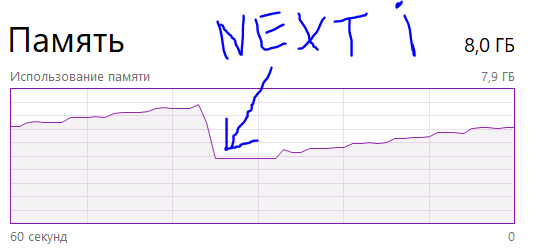

In [48]:
%%time
# сформируем выборки дл BERT. устранение дисбаланса в данном случае также осуществляется средствами моделей (class_weight='balanced')

data_bert_train, data_bert_test = train_test_split(data.sample(n=10000),test_size=0.2,random_state=12345)

#Создаем датафрейм и заполняем вектора по тренировочной выборке, обрабатываем первые 100 текстов
data_split_batch = data_bert_train.iloc[0:100:]
print(data_split_batch.shape)
features_train_bert = pd.DataFrame(make_embeddings(data_split_batch['text']))

#таргеты просто сохраняем
target_train_bert = data_bert_train['toxic']

#Обходим по циклу учебную выборку по 100 текстов, начиная со второй итерации
for i in tqdm(range(1,80)):
    data_split_batch = data_bert_train.iloc[(100*i):(100*(i+1)):]
    features_train_bert = features_train_bert.append(pd.DataFrame(make_embeddings(data_split_batch['text'])))

#аналогично для тестовой выборки
data_split_batch = data_bert_test.iloc[0:100:]
print(data_split_batch.shape)
features_test_bert = pd.DataFrame(make_embeddings(data_split_batch['text']))
for i in tqdm(range(1,20)):
    data_split_batch = data_bert_train.iloc[(100*i):(100*(i+1)):]
    features_test_bert = features_test_bert.append(pd.DataFrame(make_embeddings(data_split_batch['text'])))

target_test_bert = data_bert_test['toxic']

(100, 3)


  0%|          | 0/79 [00:00<?, ?it/s]

(100, 3)


  0%|          | 0/19 [00:00<?, ?it/s]

Wall time: 1h 13min 27s


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Действительно, немного странно, но ладно, если работает, то имеет право на жизнь)
</div>

In [51]:
print(features_test_bert.head())

      0         1         2         3         4         5         6      \
0 -6.881474 -6.854371 -6.775249 -6.792335 -6.853459 -6.860012 -6.859506   
1 -6.528604 -6.500546 -6.446366 -6.425536 -6.493169 -6.508550 -6.484176   
2 -6.761006 -6.738254 -6.698967 -6.737831 -6.740881 -6.743036 -6.761782   
3 -6.633099 -6.646534 -6.613797 -6.560154 -6.613000 -6.680804 -6.654652   
4 -6.260056 -6.217031 -6.231545 -6.246459 -6.239494 -6.255177 -6.274478   

      7         8         9      ...     30512     30513     30514     30515  \
0 -6.828019 -6.795990 -6.804531  ... -6.297739 -6.307233 -6.353778 -6.240409   
1 -6.480221 -6.459320 -6.475421  ... -5.915771 -6.028035 -5.992058 -5.991991   
2 -6.750037 -6.717628 -6.703818  ... -6.158628 -6.388016 -6.142550 -6.177586   
3 -6.660597 -6.601663 -6.612596  ... -6.109475 -6.188243 -6.126184 -6.019745   
4 -6.294291 -6.290958 -6.230563  ... -5.644109 -5.829984 -5.629950 -5.733303   

      30516     30517     30518     30519     30520     30521  
0 -6

In [52]:
print(features_train_bert.info())
print(features_test_bert.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 99
Columns: 30522 entries, 0 to 30521
dtypes: float32(30522)
memory usage: 931.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 99
Columns: 30522 entries, 0 to 30521
dtypes: float32(30522)
memory usage: 232.9 MB
None


In [55]:
features_train_np = features_train_bert.to_numpy()
features_test_np = features_test_bert.to_numpy()

In [61]:
print(features_train_np)

[[-6.418116  -6.3903866 -6.3658605 ... -5.738906  -5.5831256 -3.4962614]
 [-6.5032635 -6.5046616 -6.4820704 ... -5.897549  -5.5930676 -3.3764946]
 [-6.65964   -6.6684146 -6.6365347 ... -5.958721  -5.6620827 -2.9453535]
 ...
 [-6.392671  -6.383506  -6.339144  ... -5.7417192 -5.3663726 -3.4852984]
 [-6.4922395 -6.4964485 -6.420295  ... -5.9220634 -5.6576996 -3.2984145]
 [-6.5747976 -6.5663548 -6.509358  ... -5.9465427 -5.6280847 -3.5585675]]


In [64]:
%%time
#Логистическая регрессия
model = LogisticRegression(random_state=123345, class_weight='balanced')
parameters = {'fit_intercept':[True,False], 'max_iter':[100,200]}
searcher = GridSearchCV(model, parameters, cv=3, scoring='f1', verbose=5, n_jobs=2)
searcher.fit(features_train_np, target_train_bert)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Wall time: 6min 7s


C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=123345),
             n_jobs=2,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 200]},
             scoring='f1', verbose=5)

In [65]:
print("Наилучший результат для ",type(model).__name__,"F1-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)
result_table.loc[len(result_table)]=('BERT',type(model).__name__,searcher.best_score_)

Наилучший результат для  LogisticRegression F1- 0.6112503852673757
Наилучшие параметры для  LogisticRegression - {'fit_intercept': False, 'max_iter': 100}


In [69]:
%%time
#LinearSVC
model = LinearSVC(random_state =12345, class_weight='balanced')
parameters = {'C':[0.5,1.0], 'max_iter':[100,200]}
searcher = GridSearchCV(model, parameters, cv=3, scoring='f1', verbose=5, n_jobs=2)
searcher.fit(features_train_np, target_train_bert)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\danie\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Wall time: 13min 57s


GridSearchCV(cv=3,
             estimator=LinearSVC(class_weight='balanced', random_state=12345),
             n_jobs=2, param_grid={'C': [0.5, 1.0], 'max_iter': [100, 200]},
             scoring='f1', verbose=5)

In [70]:
print("Наилучший результат для ",type(model).__name__,"F1-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)
result_table.loc[len(result_table)]=('BERT',type(model).__name__,searcher.best_score_)

Наилучший результат для  LinearSVC F1- 0.649391138968329
Наилучшие параметры для  LinearSVC - {'C': 0.5, 'max_iter': 200}


In [ ]:
result_table

<div class="alert alert-warning">
<b>Комментарий от ревьюера v1</b> 
    
⚠️ Ты обучил много моделей и попробовал несколько вариантов предобработки данных, во всех случаях ты используешь GridSearchCV - это хороший инструмент, но при использовании с кодировкой или преобразованием признаков, лучше использовать его вместе c Pipeline(позволяет объеденить предобработку признаков и обучение модели). Когда GridSearchCV разбивает выборку на тренировочную и валидационную, то он валидируется на тех же данных, на которых проходило обучение Tf-Idf кодировщика, что может привести к утечке таргета. Если передать pipeline, то он каждый раз будет заново проходить весь путь обработки признаков и отдельно обучать тренировочную и валидационную выборку. (https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html пример)
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> не успеваю разобраться как разместить в pipline spacey. 
    Но я ушел от ручного устранения дисбаланса к заданию в моделях параметра class_qeight = 'balanced'. Как минимум для валидации теперь не используются данные с устраненным дисбалансом.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Да, теперь ошибки в этом нет. Если будет время для разбирательств, то посмотри в сторону создания своего класса предобработки, там необходимо будет реализовать методы fit и transform. 
</div>

## Выводы

In [71]:
from sklearn.metrics import f1_score
best_model = LinearSVC(random_state = 12345,  C=0.5, max_iter= 100) 

best_model.fit(features_train_spacy, target_train)
predicted_test = best_model.predict(features_test_spacy) 
f1 = f1_score(target_test, predicted_test) 
f1

0.7800555941626129

In [72]:
best_model = best_model = LinearSVC(random_state = 12345,  C=0.5, max_iter= 200) 

best_model.fit(features_train_np, target_train_bert)
predicted_test = best_model.predict(features_test_np) 
f1 = f1_score(target_test_bert, predicted_test) 
f1

C:\Users\danie\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.1201923076923077

Удалось достичь нужной f1 меры на тестовой выборке при помощи модели LinearSVC с параметрами max_iter = 100, C = 0.5.
Выполнение анализа средствами BERT дало существенно худшие метрики. Не укладывающиеся в поставленную задачу. Что может быть связано с аппаратными ограничениями - на имеющихся мощностях удалось обсчитать менее 10% представленных данных. 


<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера v1</b>
    
# Общий вывод
    
✔️ Спасибо за работу, ты сделал даже больше, чем нужно было. В работе выполнен хороший анализ данных и обучено большое количество моделей, особенно хорошо получился BERT, токенизация и создание эмбэддингов произведены правильно. Несколько советов:
- Если ты видишь, что у тебя метрика f1 равна 1, то ещё несколько раз просмотри свой проект, скорее всего ты где-то ошибся(подозреваю, что это из-за распределения тестовой выборки);
- Чаще выводи результаты своих преобразований, проверяй данные после разделения/предобработки и любых других манипуляций, так ты быстрее отловишь все ошибки.
</div>

<div class="alert alert-block alert-danger">

    
❌ Необходимо поправить:
    
- Нужно помнить, что upsampling или downsampling мы должны делать только на обучающей выборке, тестовая должна отражать распределение реальных данных;
- Исправь процес лемматизации данных, проверь, свою функцию на одном предложении;
- Аккуратней при преобразовании данных с помощью BERT, странно, что ты не получил ошибку при вызове train_test_split, так как ты преобразуешь 290 комментариев, а меток у тебя 299.
</div>

Уверен, что ты легко это исправишь, если будут вопросы - задавай) Жду твою работу, удачи!

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
исправил. Проверку работы "на одном предложении" затер пока правил. Поэтому вывожу .head() уже после того как посчитал весь проект. Пересчитывать уже не успею. Придется bert тогда выкидывать или еще что. А меня уже по итогам дня в академ отправляют.
    Просьба принять так.
</div>


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Ты исправил все ошибки и получил очень хорошее качество на тесте, поэтому я принимаю проект. Не знаю, может тебе академ нужен по временным причинам, но твой проект на уровень выше остальных, поэтому мне кажется, что ты хорошо освоил программу курса. Надеюсь, что все будет хорошо, удачи)
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны